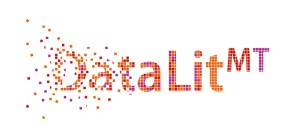

# Data Evaluation – Companion Notebook for MT Quality Evaluation at Document Level
**MT Quality Score Calculator at Document Level for Metrics Based on String Matching and for Embedding-based Metrics**

# Introduction

This is a companion notebook for our [Basic](https://colab.research.google.com/drive/1KY2qGmDoJOSOPewseVszL0u8J-x7xa7I?usp=sharing) and [Advanced](https://colab.research.google.com/drive/1UgsqgN-6yfDESU7Geei4RXzJShEQNViZ?usp=sharing) MT Quality Evaluation notebooks, which allows you to calculate MT quality scores for an entire text. We implement this document-level evaluation for the four metrics covered in our main notebooks, i.e., BLEU and TER, BERTScore and COMET. 

The code used for these calculations is adopted largely from the Natural Language Toolkit ([NLTK](https://www.nltk.org/)) and the respective GitHub repositories of each metric, as referenced in this notebook.

## 0 Housekeeping

You can run all cells in this notebook without having to change any of the code.
However, in the examples discussed below, feel free to indicate your own (text) files, if you'd like to calculate individual scores. In our tutorial video, we will show you what you need to do if you want to deviate from the workflow illustrated in this video to calculate document-level scores for your own texts.

We first need to ensure that we installed/upgraded pip. To do so, run the cell below.

In [ ]:
# Upgrade to the current version of pip
!pip install --upgrade pip

### Evaluate Your Own Documents

Note: This step is only relevant, if you would also like to evaluate the quality of your own documents. Otherwise, continue to the next step 'Clone our GitHub Repository'.

If you would like to know how to upload your own documents to calculate the metrics covered in this notebook, you can look at the accompanying tutorial video that will guide you through that process.

To upload documents from your Google Drive, you would need to run the following cell and change the directory to **your folder**. If you would like, you can also access TED2020 documents, as we use in our [Data Planning and Data Collection](https://colab.research.google.com/drive/17aCfPF0Zw80gW0FYg_iRo16YVSMAaNKG?usp=sharing) and our [Data Processing](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing) resources, in [this GitHub folder](https://github.com/ITMK/DataLitMT/tree/main/learning_resources/quality_evaluation/TED). These steps are shown in the tutorial video.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to your folder
%cd /content/drive/MyDrive/YOUR_FOLDER/
!ls

Now you need to assign variables (such as *source*, *reference* and *hypothesis*) to your files to check that they are of the same length. In the code cell below, change the names of your reference, hypothesis and source. Then run the cell.

In [ ]:
with open('YOUR_REFERENCE', 'r') as reader:
  reference = reader.readlines()

with open('YOUR_HYPOTHESIS', 'r') as reader:
  hypothesis = reader.readlines()

with open('YOUR_SOURCE', 'r') as reader:
  source = reader.readlines()

print('Length of reference', len(reference))
print('Length of hypothesis', len(hypothesis))
print('Length of source', len(source))

#### Calculate average scores for your files

Run the cells below to calculate the BLEU, TER, BERTScore and COMET scores. Make sure, all packages are still installed, otherwise re-install them for each metric (in sections 1.0, 3.0 and 4.0).

In [ ]:
# Calculate an average sacreBLEU score for your text file
!sacrebleu YOUR_REFERENCE -i YOUR_HYPOTHESIS -m bleu --score-only --width 2

In [ ]:
# Calculate an average TER for your text file
!sacrebleu YOUR_REFERENCE -i YOUR_HYPOTHESIS -m ter --score-only --width 2

In [ ]:
# Calculate an average BERTScore for your text file
!bert-score -r YOUR_REFERENCE -c YOUR_HYPOTHESIS --lang de

In [ ]:
# Calculating an average COMETinho Score for your text file
!comet-score -s YOUR_SOURCE -t YOUR_HYPOTHESIS -r YOUR_REFERENCE --model eamt22-cometinho-da --gpu 0

In [ ]:
# Calculating an average Quality Estimation Score for your text file
!comet-score -s YOUR_SOURCE -t YOUR_HYPOTHESIS --model wmt21-comet-qe-mqm --gpu 0

## Clone our GitHub Repository

First, we need to clone our [DataLit<sup>MT</sup> GitHub Repository](https://github.com/ITMK/DataLitMT/tree/main) to access the three text files we'll be working with in this notebook. Simply run the  code cell below.

In [ ]:
!git clone https://github.com/ITMK/DataLitMT.git

Let's now change the directory directly to the folder that contains the three files so we can easily refer to the files throughout the notebook.

In [3]:
%cd "/content/DataLitMT/learning_resources/quality_evaluation/example_texts/"
!ls

/content/DataLitMT/learning_resources/quality_evaluation/example_texts
HT_reference  NMT_hypothesis  source


The files we use in this notebook are taken from our [Data Evaluation notebook on machine translationese and post-editese](https://colab.research.google.com/drive/1H_Nn-TRbOJlGPp2tmcJ_EAdIhlDC-xVK?usp=sharing). Ideally, have a look at these files to see what you will be working with. On the left-hand-side of this notebook, there is an icon indicating a folder with your files. By clicking on the three vertical dots on the right of the files of `NMT_hypothesis`, `HT_reference` and `source`, you can download these and open them locally on your desktop. These steps will also be shown in our tutorial video.

To ensure the files are of the same length (the documents need to have an exact same number of sentences), you can run the code cell below. Each file should have a length of 16 (16 sentences). Having the same length is required to calculate automatic quality metrics at document level, so checking the length of the files is good practice.

In [4]:
with open('HT_reference', 'r') as reader:
  reference = reader.readlines()

with open('NMT_hypothesis', 'r') as reader:
  hypothesis = reader.readlines()

with open('source', 'r') as reader:
  source = reader.readlines()

print('Length of reference', len(reference))
print('Length of hypothesis', len(hypothesis))
print('Length of source', len(source))

Length of reference 16
Length of hypothesis 16
Length of source 16


# 1 BLEU (sacreBLEU implementation)

Here, we calculate document-level BLEU scores using the [sacreBLEU implementation](https://github.com/mjpost/sacrebleu).

## 1.0 Importing Necessary Functions

In [ ]:
# Import sacreBLEU functions
!pip install sacrebleu
import sacrebleu
from sacrebleu.metrics import BLEU, TER

## 1.1 Calculating an average sacreBLEU score for an entire text

We have the machine-translated text file `NMT_hypothesis` and the human-translated reference text `HT_reference`. Simply run the code cell below to calculate an average sacreBLEU score for the entire text.

Note: In the code cell below, `bleu` indicates that we want to calculate the BLEU score. The sacreBLEU package also allows calculating other metrics such as TER (as shown below). `--score-only` (could also be written as `-b`) indicates that we only want the actual score to be printed (i.e., we want no detailed information on score calculation). If you are interested in the details, feel free to delete `--score-only` in the cell below. Similarly, `--width 2` (could also be written as `--w`) indicates that we only want to have two values after the decimal point. This number could be changed or `--width 2` could be removed to show only one value after the decimal point.

In [9]:
# Calculate an average sacreBLEU score for the entire text file
!sacrebleu HT_reference -i NMT_hypothesis -m bleu --score-only --width 2

34.69


If everything went well, we should get an average sacreBLEU score for the *NMT_hypothesis* text of **34.69**. For information on how to interpret this score and the other scores calculated in this notebook, see our main notebooks on MT quality evaluation.

##2 TER

Here, we calculate document-level TER. To do so, we can also use the [sacreBLEU package](https://github.com/mjpost/sacreBLEU#ter) installed above. In our BLEU calculation above, we indicated `bleu` in the code cell. Using the same sacreBLEU package, we can simply indicate `ter` in the code cell below to calculate an average TER score for the entire text.

## 2.1 Calculating an average TER score for an entire text

We have the machine-translated text file `NMT_hypothesis` and the human-translated reference text `HT_reference`. Simply run the code cell below to calculate an average TER score for the entire text.

In [6]:
# Calculate TER
!sacrebleu HT_reference -i NMT_hypothesis -m ter --score-only --width 2

56.80


Again, if everything went well, we should get an average TER score for the *NMT_hypothesis* text of **56.80**.

# 3 BERTScore

Here, we calculate document-level BERTScore.

## 3.0 Installing BERTScore

First, we need to install the packages required to compute BERTScore. BERTScore is implemented as part of the bert-score package available in the [official BERTScore GitHub repository](https://github.com/Tiiiger/bert_score). Since embedding-based metrics rely on large embedding models, installing these metrics will usually take considerably longer than installing and importing traditional MT quality scores.

In [ ]:
!pip install bert-score

## 3.1 Calculating an average BERTScore for an entire text

We have the machine-translated text file `NMT_hypothesis` and the human-translated reference text `HT_reference`. Simply run the code cell below to calculate an average BERTScore score for the entire text. This may take a little while.

Note: In this notebook we use `--lang de`, as the output texts we are working with are German. If you are using texts with a different language, you need to change the language code in the cell below. This step is also shown in our tutorial video.

In [8]:
!bert-score -r HT_reference -c NMT_hypothesis --lang de

2023-02-27 11:44:29.544323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 11:44:31.757741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 11:44:31.757919: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 11:44:31.757952: W tensorfl

The following three BERTScores should have been calculated:

*   Precision `P: 0.874346`
*   Recall `R: 0.869231`
*   F-Measure `F1: 0.871666`

The average BERTScore (F1 score) calculated for the entire *NMT_hypothesis* text is therefore **0.871666**.

# 4 COMET

Here, we calculate document-level COMET scores.

## 4.0 Installing COMETinho
First, we need to install the packages required to compute COMETinho. COMETinho is implemented as part of the unbabel-comet package available in the [official COMET GitHub repository](https://github.com/Unbabel/COMET).

Note: Running this cell might result in requesting you to restart the runtime of this notebook: "You must restart the runtime in order to use the newly installed version". You can restart the runtime in the menu under "runtime" --> "restart runtime". Then, you must run the cell in chapter 0 and the code cell below again before moving on to section 4.1.

In [ ]:
# Install the most recent unbabel-comet package
!pip install unbabel-comet==1.1.3

# In case this is outdated, check out the newest version or simply uncomment and install the line below
#!pip install unbabel-comet

## 4.1 Calculating an average COMETinho score for an entire text

Again we have `NMT_hypothesis` as the machine-translated text and `HT_reference` as the human-translated text. In contrast to the three metrics above, we now also need a source document, so we'll now also indicate the source text `source` in our code cell below.

Now we can calculate an average COMETinho score for the entire *NMT_hypthesis* text. We use the same COMETinho Estimator model (`eamt22-cometinho-da`), as in our [Advanced MT Quality Evaluation notebook](https://colab.research.google.com/drive/1UgsqgN-6yfDESU7Geei4RXzJShEQNViZ?usp=sharing). Simply run the code cell below (this may take a while).

In [11]:
# Calculating the COMETinho Score
!comet-score -s source -t NMT_hypothesis -r HT_reference --model eamt22-cometinho-da --gpu 0

2023-02-27 11:45:46.441223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 11:45:48.033826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 11:45:48.034093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 11:45:48.034138: W tensorfl

The average COMETinho score calculated for the entire *NMT_hypothesis* text is shown at the bottom (*NMT_hypothesis score*) and should be **0.6089**. Above this average score, you can see a individual scores for each segment (each sentence in the text files). Counting starts at 0 and ends at 15, representing the 16 lines in each of our text files. Our sentence COMETinho scores range from 0.0592 to 1.6138.

## 4.2 Calculating an average COMET Quality Estimation score for an entire text

Below, we load the COMET Quality Estimation (QE) model (`wmt21-comet-qe-mqm`) and calculate a quality estimation score is calculated for the hypothesis and source texts (without access to the reference text). Again, calculating this document-level score may take a while.

In [12]:
# Calculating the Quality Estimation Score
!comet-score -s source -t NMT_hypothesis --model wmt21-comet-qe-mqm --gpu 0

2023-02-27 11:46:55.579046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 11:46:56.780095: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 11:46:56.780211: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 11:46:56.780228: W tensorfl

The average COMETinho (QE) score calculated for the entire *NMT_hypothesis* text is **0.1208**. Again, individual segment scores are shown above the average score. The segment scores range from 0.0543 to 1.1589.

Congratulations! You have now successfully calculated various automatic MT quality evaluation metrics for entire texts (at document level). You are now well prepared to evaluate the quality of MT systems and of machine-translated texts, which is becoming more and more relevant in the professional industry. You could also perform an automatic quality evaluation on your own machine translations created with your own NMT model, which you can train in our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).